<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >

# 7. Computación simbólica

El lenguaje de las matemáticas no es numérico, sino simbólico. Los humanos somos capaces de manejar información abstracta que nos permite realizar transformaciones del siguiente tipo:

$f(x) = x^2-x-2 = (x+1)(x-2)$

${d^2 sen(3x)\over dx^2} = -9\ cos(3x)$

Existen programas como $\it{Maple}$ o $\it{Mathematica}$ que trabajan con símbolos. Son muy potentes pero tienen un precio de licencia elevado. Existe una alternativa $\it{open source}$ basada en Python, el paquete SymPy.

SymPy puede ejecutarse online en la URL https://live.sympy.org

## Definición de símbolos

Cuando trabajamos con Python o cualquier otro lenguaje común de programación, estamos acostumbrados a usar variables
con las que operamos
    


In [1]:
a = 7
b = 8
print("El resultado de la operación a + b es ",a+b)

El resultado de la operación a + b es  15


In [2]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt

x = sp.symbols('x')
y = sp.symbols('y')
print('El resultado de la operación x + y en SympPy es',x+y)

El resultado de la operación x + y en SympPy es x + y


Se han definido dos símbolos $x$,$y$ y el resultado es un nuevo símbolo $x+y$, no un valor numérico. Con SymPy se pueden realizar operaciones simbólicas de mayor complejidad.

In [3]:
factor1 = x+1
factor2 = x-2
pfact = factor1*factor2
print("El producto de los factores (",factor1,")(",factor2, ") es",pfact)

El producto de los factores ( x + 1 )( x - 2 ) es (x - 2)*(x + 1)


Aparentemente no ha ocurrido nada, salvo que la expresión aparece con la sintaxis propia de Python. Podemos hacer que el polinomio aparezca desarrollado.

In [4]:
print("El producto de los factores (",factor1,")(",factor2, ") es",sp.expand(pfact))

El producto de los factores ( x + 1 )( x - 2 ) es x**2 - x - 2


La función `sympyfy` convierte un texto en objetos SymPy siempre que la sintaxis sea correcta

In [5]:
frac = sp.symbols('frac')
frac = sp.sympify('x**2/y')
print(frac)

x**2/y


## Tipos

Aparte de los símbolos, SymPy puede manejar tipos de datos que no son los habituales en Python pero sí en el razonamiento matemático humano.

In [6]:
# Número racionales
var1 = sp.sympify('1/6')
print("var1",var1)
var2 = sp.sympify('(5/8)')*var1
print("var2",var2)
print("Tipo de var2",type(var2))
print("Valor de var2 en punto flotante con 10 decimales de precisión",var2.evalf(10))

# Potencias
var3= sp.sqrt(2)
print("var3",var3)
print("Tipo de var3",type(var3))
print("var2*var3 =",sp.Mul(var2,var3))
print("Tipo de var2*var3 ",type(var2*var3),"valor en punto flotante =",(var2*var3).evalf(10))


var1 1/6
var2 5/48
Tipo de var2 <class 'sympy.core.numbers.Rational'>
Valor de var2 en punto flotante con 10 decimales de precisión 0.1041666667
var3 sqrt(2)
Tipo de var3 <class 'sympy.core.power.Pow'>
var2*var3 = 5*sqrt(2)/48
Tipo de var2*var3  <class 'sympy.core.mul.Mul'> valor en punto flotante = 0.1473139127


## Evaluación

Con frecuencia, necesitamos evaluar una expresión simbólica para determinado valor. Si queremos conocer el valor de $f(x) = x^3 -x -2*cos(\pi x)$ en el punto $x=0.3$, tenemos que usar el método `subs` para cambiar la incógnita por el valor y el método `evalf` para evaluar la expresión.

In [7]:
x,f = sp.symbols('x f')
f = x**3 - x - 2*sp.cos(sp.pi * x)
print("La función es f(x)=",f)
print("f(0.3) =",(f.subs(x,0.3)).evalf(8))      # El parámetro de evalf indica el número de cifras decimales

La función es f(x)= x**3 - x - 2*cos(pi*x)
f(0.3) = -1.4485705


Cuando usamos SymPy tenemos que tener mucho cuidado con las comparaciones. El operador $==$ compara si dos expresiones son iguales.

In [8]:
x,y,z = sp.symbols('x y z')
y = sp.sin(x)
z = sp.sin(x)
# los símbolos y,z son estructuralmente idénticos
print(y,'==',z,y == z)

# Sin embargo SymPy no es capaz de detectar por defecto que cos(2x) == cos^2(x)-sin^2(x) con el operador ==
a,b = sp.symbols('a b')
a = sp.cos(x)**2 - sp.sin(x)**2
b = sp.cos(2*x)
print(b,'==',a,b==a)

# Pero sí es capaz de hacerlo con el método equals
print(b,"equals",a,a.equals(b))


sin(x) == sin(x) True
cos(2*x) == -sin(x)**2 + cos(x)**2 False
cos(2*x) equals -sin(x)**2 + cos(x)**2 True


Podemos dibujar la gráfica de la función usando este mismo procedimiento.

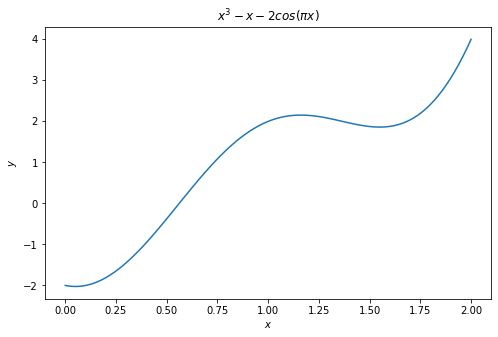

In [9]:
xpuntos = np.linspace(0,2,100)
ypuntos = []
for i in xpuntos:
    ypuntos.append((f.subs(x,i)).evalf(8))
plt.figure(figsize=(8,5)) # tamaño de la gráfica en pulgadas
plt.plot(xpuntos,ypuntos)
plt.title('$x^3-x-2cos(\pi x)$')
plt.xlabel('$x$') # título del eje horizontal
plt.ylabel('$y$') # título del eje  vertical
plt.show()

Hay una manera más eficiente de evaluar en múltiples puntos, la función `lambdify`.

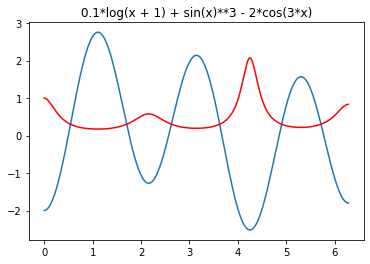

In [10]:
expresionmat = sp.symbols('expresionmat')
a = np.linspace(0,2*np.pi,1000) 
expresionmat = sp.sin(x)**(3)-2*sp.cos(3*x)+sp.log(1+x)*0.1
f = sp.lambdify(x, expresionmat, "numpy")  # Convierte la expresión simbólica a la funciones equivalentes de de NumPy
plt.plot(a,f(a)) 
plt.title(expresionmat)
plt.plot(a,1/(3+f(a)),color="red") 
plt.show()

## Presentación

Una de las características más interesantes de SymPy es su capacidad de formatear la salida como en un texto matemático convencional.

In [11]:
# La función f del ejemplo anterior está escrita con sintaxis Python que es la que entiende el lenguaje
print(expresionmat)

0.1*log(x + 1) + sin(x)**3 - 2*cos(3*x)


In [12]:
# SymPy permite presentar la misma expresión

sp.init_printing() 
sp.pprint(expresionmat)
expresionmat

                    3                
0.1⋅log(x + 1) + sin (x) - 2⋅cos(3⋅x)


In [13]:
# Si el equipo tiene instalado LaTeX, la salida será aun más legible

from sympy import init_session
init_session(use_latex=True)
expresionmat


IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [14]:
x = sp.sqrt(3)
pprint(Mul(x,  x, evaluate=False))
print('es igual a',x*x)

√3⋅√3
es igual a 3


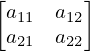

In [15]:
a11,a12,a21,a22 = symbols('a11 a12 a21 a22')
A = sp.Matrix([
            [a11, a12],
            [a21, a22]
    ])
A

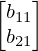

In [16]:
b11,b21 = symbols('b11 b21')
B = sp.Matrix([[b11, b21]])
B.T

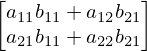

In [17]:
C=A*B.T
C

---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 